# 3D Graphics Systems | AI Graphics - Theory and Practice | IMPA 2023
### Instructor: Luiz Velho
### TA: Hallison Paz
### Course info: https://lvelho.impa.br/i3d23/

## Lab Class #5 - Convolutional Neural Networks

**For this assignment, you must choose 1 from the following 2 activities proposed.**

---
#**Personal Info:**
*   **Student:**
    *   Sherlon Almeida da Silva
*   **Affiliation:**
    *   PhD Student
    *   University of São Paulo (USP)
    *   Institute of Mathematics and Computer Science (ICMC)
    *   Laboratory of Visualization, Imaging and Computer Graphics (VICG)
*   **Research & Programming:**
    *   [Lattes](http://lattes.cnpq.br/0000096258045504) | [ORCID](https://orcid.org/0000-0001-6124-9350) | [Google Scholar](https://scholar.google.com.br/citations?user=boFxo4gAAAAJ&hl=pt-BR) | [Linkedin](https://www.linkedin.com/in/SherlonAlmeida/) | [Github](https://github.com/SherlonAlmeida) | [Personal Page](http://vicg.icmc.usp.br/vicg/person/72/sherlon-almeida-da-silva)
---

---------
#First Part
---------

## [Option 1] Convolutional Neural Networks for Analysis Tasks

In this practice, you'll train and evaluate a Convolutional Neural Network (CNN) on the Fashion-MNIST. This exercise serves as a smooth introduction to CNNs, so if you are not familiar with these architectures or does not have much time to dig deeper in this topic at this moment, this is the recommended track.

**[Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST)** is a classic dataset containing 70,000 grayscale images of fashion products from 10 different categories, in the spirit of the original MNIST dataset. The dataset is divided as 60,000 training images and 10,000 for the test set.

This is one of the datasets that we can access though `torchvision.dataset`, which makes things easier to integrate in our PyTorch solution.  

**You should construct a neural network classifier that can predict the class of each product in the dataset.**


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import random_split, DataLoader

1. Create a train-test-val split. 
  * First check [here](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) to know how to get a train-test split. Then use `random_split` ([docs](https://pytorch.org/docs/stable/data.html?highlight=random_split#torch.utils.data.random_split)) to break your train set in a ratio [55000, 5000]. 
  * Create their respective loaders using `DataLoader`.

In [2]:
#Setting the transformations to be made
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.2660,), (0.3530,)) 
                                     ])

In [3]:
#Obtaining Dataset
mnist_data = torchvision.datasets.FashionMNIST(root=os.getcwd(), train=True, transform=mnist_transform, download=True)
test = torchvision.datasets.FashionMNIST(root=os.getcwd(), train=False, transform=mnist_transform, download=True)

In [4]:
#Splitting Data in Train and Validation
generator = torch.Generator().manual_seed(42)
train_size, test_size = 55000, 5000
train, validation = random_split(mnist_data, [train_size, test_size], generator=generator)

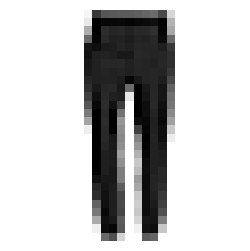

In [5]:
#Plotting a sample
plt.figure(figsize=(3,3))
image, label = mnist_data.__getitem__(2023)
plt.imshow(  image.view(28, 28).numpy(), cmap = 'gray_r' )
plt.axis('off')
plt.show()

In [6]:
#Preparing dataloaders
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validation_dataloader = DataLoader(validation, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

2. Visualize and understand your data
  * Use the function `display_batch` (or create your own function) to visualize a batch of images in a organized manner.
  * Check the size of the datasets, as well as the shape of the images.
  * Check how balanced each dataset split is: You can use `torch.bincount` feature.

In [7]:
"""Reference: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html"""
def show(images, labels, rows=3, columns=10):
  #img_grid = torchvision.utils.make_grid(images, nrow=nrow).numpy()
  #plt.figure()
  #plt.imshow(np.transpose(img_grid, (1, 2, 0)), interpolation='gaussian')
  #plt.axis('off')
  #plt.show()

  fig = plt.figure(figsize=(16,5))

  for i in range(rows):
    for j in range(columns):
      image, label = images.__getitem__(i*columns+j)
      ax = fig.add_subplot(rows, columns, (i*columns+j)+1)
      ax.imshow(image.view(28, 28).numpy(), cmap = 'gray_r')
      plt.title(labels[label])
      plt.axis('off')

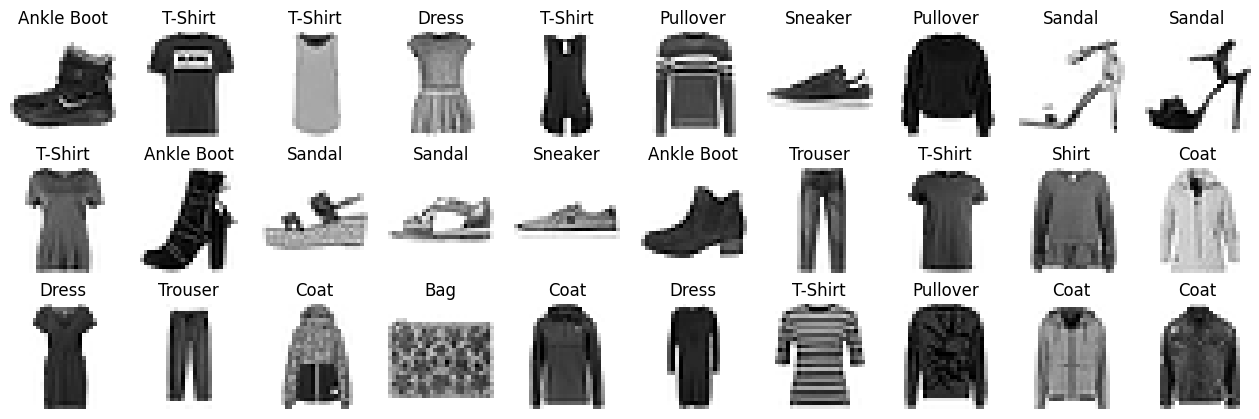

In [8]:
#Plotting some samples
labels_map = { 0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
show(mnist_data, labels_map)

In [9]:
#Checking splits
len(train), len(validation), len(test)

(55000, 5000, 10000)

In [10]:
#Checking shapes (The images are grayscale with 28x28 pixels)
image, label = mnist_data.__getitem__(0)
print(image.shape)

torch.Size([1, 28, 28])


In [11]:
#Showing data distribution (Total)
train_indexes = train.dataset.targets[train.indices]
validation_indexes = validation.dataset.targets[validation.indices]
test_indexes = test.targets
print(f"Train ({len(train_indexes)}): {torch.bincount(train_indexes)}")
print(f"Validation ({len(validation_indexes)}): {torch.bincount(validation_indexes)}")
print(f"Test ({len(test_indexes)}): {torch.bincount(test_indexes)}")

Train (55000): tensor([5452, 5490, 5473, 5524, 5490, 5491, 5510, 5555, 5508, 5507])
Validation (5000): tensor([548, 510, 527, 476, 510, 509, 490, 445, 492, 493])
Test (10000): tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])


In [12]:
#The splits seem to be well balanced (%)
train_percent = torch.bincount(train_indexes)*100/len(train_indexes)
validation_percent = torch.bincount(validation_indexes)*100/len(validation_indexes)
test_percent = torch.bincount(test_indexes)*100/len(test_indexes)
print(f"Train ({len(train_indexes)}): {[round(i.item(), 2) for i in train_percent]}")
print(f"Validation ({len(validation_indexes)}): {[round(i.item(), 2) for i in validation_percent]}")
print(f"Test ({len(test_indexes)}): {[round(i.item(), 2) for i in test_percent]}")

Train (55000): [9.91, 9.98, 9.95, 10.04, 9.98, 9.98, 10.02, 10.1, 10.01, 10.01]
Validation (5000): [10.96, 10.2, 10.54, 9.52, 10.2, 10.18, 9.8, 8.9, 9.84, 9.86]
Test (10000): [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


3. Design a Convolutional Neural Network model. 
  * You can use the base model below as your starting point. Experiment some different configurations, for example, making it deeperUsing `torch.nn` define a two layers feedforward neural network with a ReLU activation. The network must receive the image in its original shape, and reshape it in order to pass throught the linear layers.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

"""
Parameters:
n_classes = number of output classes
n_channels = number of channels (e.g grayscale=1, coloredRGB=3)
"""
class FashionCNN(nn.Module):
    def __init__(self, n_classes=10, n_channels=1):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=16, kernel_size=3, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(in_features=32*5*5, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(64, n_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

3. Using the `CrossEntropyLoss` loss function you must set an `optimizer` and train your network on the Fashion MNIST. You should set a print statement or a progress bar to print your training loss.

4. Test your model in your test dataset. Remember to use `torch.no_grad`.

5. Add a validation step in your training loop, saving your validation loss throughout the training. After the training plot the curve of the progress of this validation loss.

In [14]:
from tqdm.notebook import tqdm
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")
device

device(type='cuda', index=0)

In [19]:
"""Reference (Example CNN): https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html"""
def train_model(model, train_loader, validation_loader, num_epochs=10):
  train_loss_acum = []
  validation_loss_acum = []
  validation_accuracy_acum = []

  for epoch in range(num_epochs):
    # Train the model on the training set
    model.train()
    train_loss = 0 #Added
    for images, labels in train_loader:
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      train_loss += loss.item() #Added
      loss.backward()
      optimizer.step()
    train_loss /= len(train_loader.dataset) #Added
    
    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
      val_loss = 0
      val_correct = 0
      for images, labels in validation_loader:
        outputs = model(images)
        val_loss += criterion(outputs, labels).item()
        _, predicted = torch.max(outputs.data, 1)
        val_correct += (predicted == labels).sum().item()
      val_loss /= len(validation_loader.dataset)
      val_accuracy = 100 * val_correct / len(validation_loader.dataset)

      #Stores the loss over epocs
      #train_loss_acum.append(loss.item())
      train_loss_acum.append(train_loss)
      validation_loss_acum.append(val_loss)
      validation_accuracy_acum.append(val_accuracy)
    
    # Print the training and validation loss and accuracy
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.2f}%'.format(epoch+1, num_epochs, train_loss, val_loss, val_accuracy))
  return model, train_loss_acum, validation_loss_acum, validation_accuracy_acum

In [20]:
import torch.optim as optim

my_model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(), lr=0.001, momentum=0.9)
num_epochs = 20

In [21]:
#Training and Validation
my_model, train_loss_acum, validation_loss_acum, validation_accuracy_acum = train_model(my_model, train_dataloader, validation_dataloader, num_epochs)

Epoch [1/20], Train Loss: 0.0237, Val Loss: 0.0125, Val Acc: 69.74%
Epoch [2/20], Train Loss: 0.0104, Val Loss: 0.0097, Val Acc: 77.62%
Epoch [3/20], Train Loss: 0.0086, Val Loss: 0.0085, Val Acc: 80.46%
Epoch [4/20], Train Loss: 0.0077, Val Loss: 0.0077, Val Acc: 82.22%
Epoch [5/20], Train Loss: 0.0071, Val Loss: 0.0073, Val Acc: 83.98%
Epoch [6/20], Train Loss: 0.0067, Val Loss: 0.0067, Val Acc: 84.94%
Epoch [7/20], Train Loss: 0.0063, Val Loss: 0.0065, Val Acc: 85.30%
Epoch [8/20], Train Loss: 0.0060, Val Loss: 0.0066, Val Acc: 85.40%
Epoch [9/20], Train Loss: 0.0058, Val Loss: 0.0061, Val Acc: 86.94%
Epoch [10/20], Train Loss: 0.0055, Val Loss: 0.0058, Val Acc: 86.68%
Epoch [11/20], Train Loss: 0.0053, Val Loss: 0.0056, Val Acc: 87.24%
Epoch [12/20], Train Loss: 0.0051, Val Loss: 0.0055, Val Acc: 87.62%
Epoch [13/20], Train Loss: 0.0050, Val Loss: 0.0055, Val Acc: 87.54%
Epoch [14/20], Train Loss: 0.0048, Val Loss: 0.0056, Val Acc: 87.52%
Epoch [15/20], Train Loss: 0.0047, Val Loss

In [22]:
def plot_loss_accuracy(train_loss_acum, validation_loss_acum, validation_accuracy_acum, num_epochs):
  # Plot the training and validation loss over epochs
  fig = plt.figure(figsize=(12,3))

  ax = fig.add_subplot(1, 2, 1)
  ax.set_title("Loss")
  plt.plot(range(1, num_epochs+1), train_loss_acum, label='Training Loss')
  plt.plot(range(1, num_epochs+1), validation_loss_acum, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  ax = fig.add_subplot(1, 2, 2)
  ax.set_title("Accuracy")
  plt.plot(range(1, num_epochs+1), validation_accuracy_acum, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

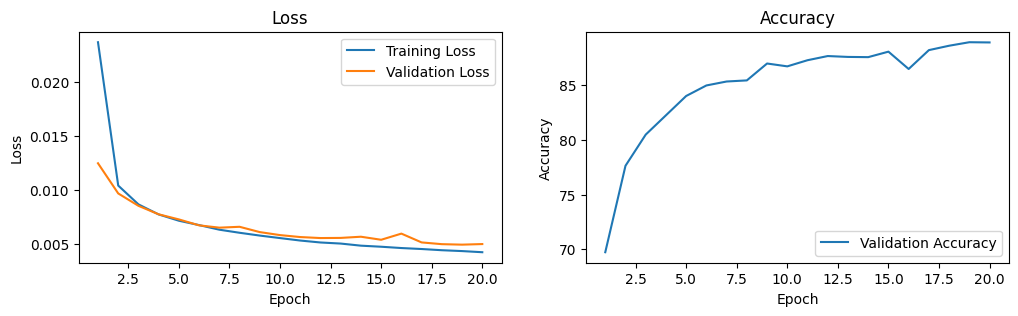

In [23]:
#Plotting the Loss and Accuracy
plot_loss_accuracy(train_loss_acum, validation_loss_acum, validation_accuracy_acum, num_epochs)

In [24]:
# Define a function to test the model on the test dataset
def test_model(model, data_loader):
    my_model.eval() # Set the model to evaluation mode
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print('Accuracy on the test dataset: {:.2f}%'.format(accuracy))

    my_model.train() # Set the model to training mode

In [25]:
# Test the model on the test dataset
test_model(my_model, test_dataloader)

Accuracy on the test dataset: 88.58%


In [26]:
from sklearn.metrics import confusion_matrix

# Define a function to test the model on the test dataset
def get_confusion_matrix_data(model, data_loader):
  my_model.eval() # Set the model to evaluation mode
    
  y_true = []
  y_pred = []
  with torch.no_grad():
    for images, labels in data_loader:
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      y_true += labels.tolist()
      y_pred += predicted.tolist()

    my_model.train() # Set the model to training mode
  return y_true, y_pred

def plot_confusion_matrix(cm, n_classes=10):
  plt.imshow(cm, cmap='Blues')
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.xticks([i for i in range(n_classes)], [str(i) for i in range(n_classes)])
  plt.yticks([i for i in range(n_classes)], [str(i) for i in range(n_classes)])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

  # Add the count values to the plot
  for i in range(n_classes):
    for j in range(n_classes):
      plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')

  plt.show()

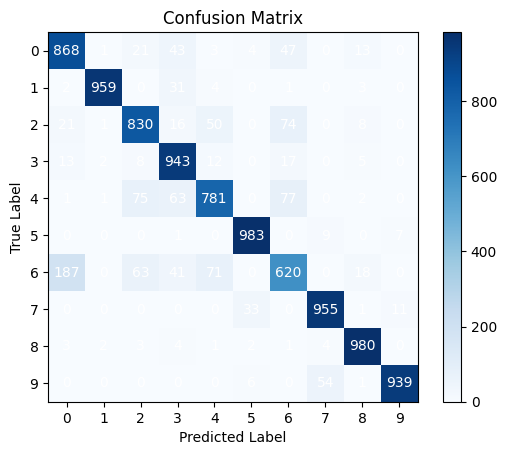

In [27]:
y_true, y_pred = get_confusion_matrix_data(my_model, test_dataloader)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, n_classes=10)

6. Try changing the learning rate, batch size, and other hyperparameters to observe how the test performance varies.

7. **[EXTRA]** Add an accuracy measure in the validation loop. You might have to modify your model in order to get the logit values, then you can use `torch.argmax` to obtain the labels predicted, which you must them compare with the true labels. Plot the evolution of the accuracy.

9. **[EXTRA]** Plot the confusion matrix for your result model and evaluate the performance of your model. We suggest using [Seaborn](https://seaborn.pydata.org/). 


In [28]:
#Preparing dataloaders (Changing Batches)
train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test, batch_size=32, shuffle=True)

In [30]:
my_2nd_model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_2nd_model.parameters(), lr=0.05, momentum=0.75)
num_epochs = 20

In [31]:
#Training and Validation
my_2nd_model, train_loss_acum, validation_loss_acum, validation_accuracy_acum = train_model(my_2nd_model, train_dataloader, validation_dataloader, num_epochs)

Epoch [1/20], Train Loss: 0.0158, Val Loss: 0.0120, Val Acc: 85.46%
Epoch [2/20], Train Loss: 0.0103, Val Loss: 0.0101, Val Acc: 87.68%
Epoch [3/20], Train Loss: 0.0090, Val Loss: 0.0099, Val Acc: 87.98%
Epoch [4/20], Train Loss: 0.0083, Val Loss: 0.0099, Val Acc: 88.78%
Epoch [5/20], Train Loss: 0.0077, Val Loss: 0.0095, Val Acc: 88.86%
Epoch [6/20], Train Loss: 0.0072, Val Loss: 0.0095, Val Acc: 88.82%
Epoch [7/20], Train Loss: 0.0068, Val Loss: 0.0090, Val Acc: 89.72%
Epoch [8/20], Train Loss: 0.0065, Val Loss: 0.0102, Val Acc: 87.64%
Epoch [9/20], Train Loss: 0.0061, Val Loss: 0.0100, Val Acc: 89.26%
Epoch [10/20], Train Loss: 0.0060, Val Loss: 0.0094, Val Acc: 90.00%
Epoch [11/20], Train Loss: 0.0057, Val Loss: 0.0103, Val Acc: 89.42%
Epoch [12/20], Train Loss: 0.0055, Val Loss: 0.0100, Val Acc: 89.26%
Epoch [13/20], Train Loss: 0.0053, Val Loss: 0.0107, Val Acc: 89.50%
Epoch [14/20], Train Loss: 0.0052, Val Loss: 0.0106, Val Acc: 89.52%
Epoch [15/20], Train Loss: 0.0051, Val Loss

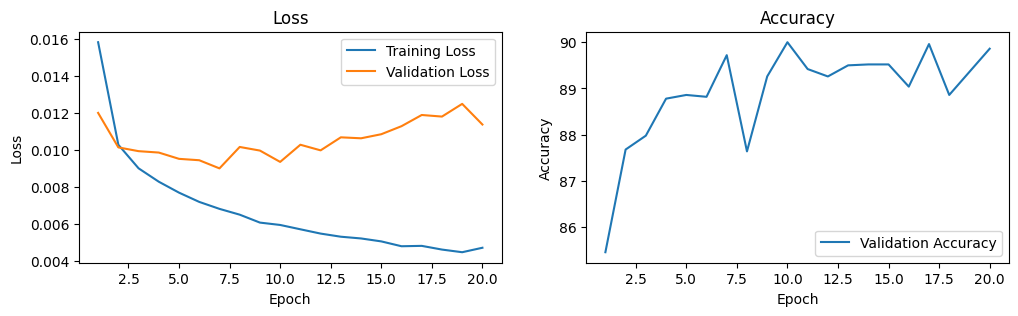

In [32]:
#Plotting the Loss and Accuracy
plot_loss_accuracy(train_loss_acum, validation_loss_acum, validation_accuracy_acum, num_epochs)

In [33]:
# Test the model on the test dataset
test_model(my_2nd_model, test_dataloader)

Accuracy on the test dataset: 90.40%


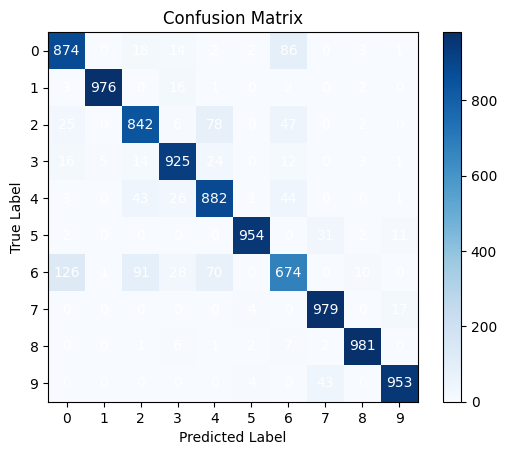

In [34]:
y_true, y_pred = get_confusion_matrix_data(my_2nd_model, test_dataloader)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, n_classes=10)